<a href="https://colab.research.google.com/github/korrapin28/BADS7105-CRM-Analytic/blob/main/Homework_06_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# 1-visit model

In [162]:
from google.colab import files
uploaded = files.upload()

Saving customer_total visit = 1.csv to customer_total visit = 1 (1).csv


In [163]:
import io
data = pd.read_csv(io.BytesIO(uploaded['customer_total visit = 1.csv']))
data.head()

,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,TOTAL_VISIT,TOTAL_SPEND,AVG_SPEND,LAST_VISIT,AVG_VISIT_PER_MONTH,AGE,PROB_WEEKEND,PROB_WEEKDAY,PROB_MORNING,PROB_AFTERNOON,PROB_EVENING,PROB_BAS_L,PROB_BAS_M,PROB_BAS_S,PROB_BAS_TYPE_FULL,PROB_BAS_TYPE_SMALL,PROB_BAS_TYPE_TOPUP,PROB_BAS_PRICE_LA,PROB_BAS_PRICE_MM,PROB_BAS_PRICE_UM,PROB_BAS_DOMI_FRESH,PROB_BAS_DOMI_GROCERY,PROB_BAS_DOMI_MIXED,PROB_BAS_DOMI_NONFOOD,CUS_PRICE_LA,CUS_PRICE_MM,CUS_PRICE_UM,CUS_LIFE_OA,CUS_LIFE_OF,CUS_LIFE_OT,CUS_LIFE_PE,CUS_LIFE_YA,CUS_LIFE_YF
0,CUST0000562965,MM,NaN,1,0.32,0.32,21,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,CUST0000104264,MM,NaN,1,0.88,0.88,4,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,CUST0000178948,MM,NaN,1,0.75,0.75,13,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,CUST0000717322,LA,NaN,1,1.99,1.99,27,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,CUST0000996266,MM,NaN,1,2.49,2.49,3,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


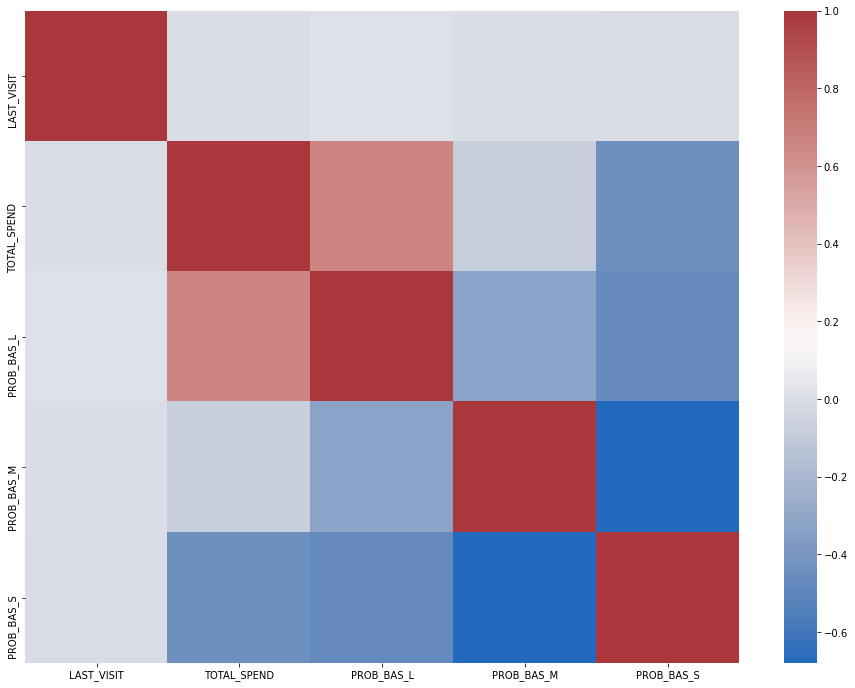

In [167]:
# For heatmap
#plot = data.drop(data.columns[[0,1,2,3]], axis = 1)
plot = data[['LAST_VISIT','TOTAL_SPEND','PROB_BAS_L','PROB_BAS_M','PROB_BAS_S']]

for col in plot.columns:
    plot[col] = (plot[col] - plot[col].mean())/plot[col].std()

plt.figure(figsize=(16,12))
#sns.color_palette("coolwarm", as_cmap=True)
heatmap = sns.heatmap(plot.corr(), cmap='vlag')#,  annot=True)
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=10);

In [179]:
#or1 = data.drop(data.columns[[1,2,3,9,10,11,12,13,14,15,16,17,18,19,20,21,22,27,28,29,30,31,32,33,34,35]], axis = 1)
#or1 = data[data.columns[3:9]]
or1 = data[['CUST_CODE','LAST_VISIT','TOTAL_SPEND']]
#df = or1.copy()
#df_norm = or1.copy()

df = or1.drop(columns='CUST_CODE').copy()
df_norm = or1.drop(columns='CUST_CODE').copy()

In [180]:
df.head()

,LAST_VISIT,TOTAL_SPEND
0,21,0.32
1,4,0.88
2,13,0.75
3,27,1.99
4,3,2.49


In [181]:
for col in df_norm.columns:
    df_norm[col] = (df_norm[col] - df_norm[col].mean())/df_norm[col].std()

,LAST_VISIT,TOTAL_SPEND
0,0.798411,-0.543557
1,-1.605831,-0.505800
2,-0.332997,-0.514565
3,1.646966,-0.430960
4,-1.747257,-0.397249


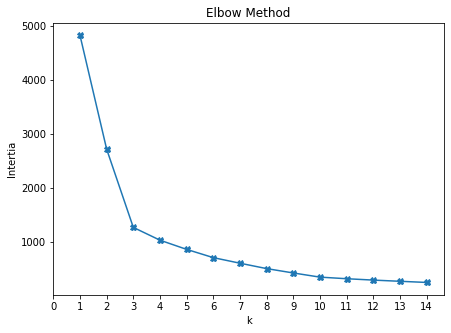

In [193]:
# Elbow Method 
intertia= []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    intertia.append(km.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K,intertia,marker="X")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [189]:
km = KMeans(n_clusters=3,random_state=400)
km.fit(df_norm)
cluster = km.predict(df_norm)

df_norm['cluster'] = cluster
df_cluster = df_norm['cluster']
df_final = pd.concat([df_cluster,df], axis=1)

In [190]:
df_print = pd.DataFrame(df_final.groupby('cluster',as_index=False).mean().round(1))

pd.set_option('display.max_columns', None)
df_print

,cluster,LAST_VISIT,TOTAL_SPEND
0,0,15.4,51.8
1,1,21.7,5.1
2,2,9.3,5.0


In [191]:
df_cluster.value_counts()

2    964
1    918
0    143
Name: cluster, dtype: int64

# Re-visit Model


In [200]:
from google.colab import files
uploaded = files.upload()

Saving customer_total visit more than 1.csv to customer_total visit more than 1 (2).csv


In [202]:
import io
data = pd.read_csv(io.BytesIO(uploaded['customer_total visit more than 1.csv']))
data.head()

,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,TOTAL_VISIT,TOTAL_SPEND,AVG_SPEND,LAST_VISIT,AGE,PROB_WEEKEND,PROB_WEEKDAY,PROB_MORNING,PROB_AFTERNOON,PROB_EVENING,PROB_BAS_L,PROB_BAS_M,PROB_BAS_S,PROB_BAS_PRICE_LA,PROB_BAS_PRICE_MM,PROB_BAS_PRICE_UM,PROB_BAS_DOMI_FRESH,PROB_BAS_DOMI_GROCERY,PROB_BAS_DOMI_MIXED,PROB_BAS_DOMI_NONFOOD,CUS_PRICE_LA,CUS_PRICE_MM,CUS_PRICE_UM,CUS_LIFE_OA,CUS_LIFE_OF,CUS_LIFE_OT,CUS_LIFE_PE,CUS_LIFE_YA,CUS_LIFE_YF
0,CUST0000735558,XX,NaN,2,12.30,6.15,4,0,0.0,1.0,0.0,0.5,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.5,0.0,0,0,0,0,0,0,0,0,0
1,CUST0000625447,MM,NaN,2,47.64,23.82,15,0,0.0,1.0,0.0,0.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0
2,CUST0000404871,MM,NaN,2,14.03,7.01,17,3,0.0,1.0,0.0,0.0,1.0,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5,0.5,0.0,0,1,0,0,0,0,0,0,0
3,CUST0000198580,MM,NaN,2,29.35,14.67,12,3,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.5,0.0,0.5,0.0,0,1,0,0,0,0,0,0,0
4,CUST0000884294,MM,NaN,2,4.12,2.06,2,9,0.5,0.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0


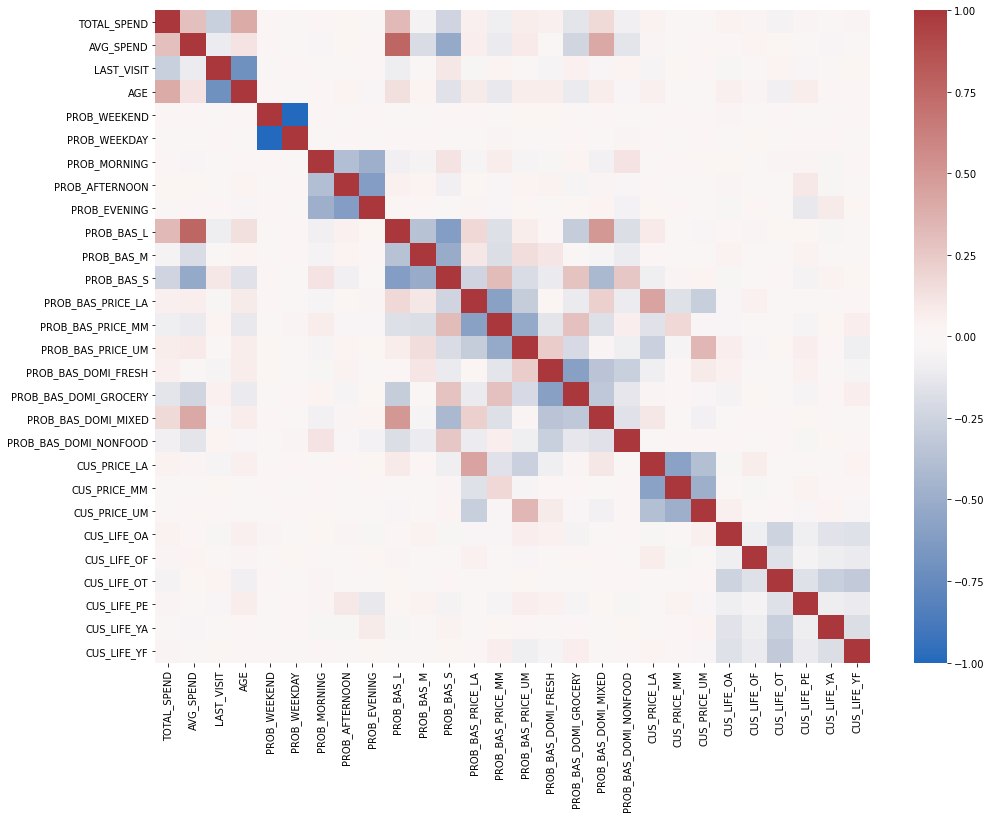

In [203]:
# For heatmap
plot = data.drop(data.columns[[0,1,2,3]], axis = 1)
#plot = data[['LAST_VISIT','TOTAL_SPEND','PROB_BAS_L','PROB_BAS_M','PROB_BAS_S']]

for col in plot.columns:
    plot[col] = (plot[col] - plot[col].mean())/plot[col].std()

plt.figure(figsize=(16,12))
#sns.color_palette("coolwarm", as_cmap=True)
heatmap = sns.heatmap(plot.corr(), cmap='vlag')#,  annot=True)
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=10);

## 1) RFM

In [283]:
#or1 = data.drop(data.columns[[1,2,3,8,9,10,11,12,13,14,15,16,17,18,23,24,25,26,27,28,29,30,31]], axis = 1)

or1 = data[['CUST_CODE','TOTAL_SPEND','AVG_SPEND','LAST_VISIT','AGE']]
#df = or1.copy()
#df_norm = or1.copy()

df = or1.drop(columns='CUST_CODE').copy()
df_norm = or1.drop(columns='CUST_CODE').copy()

In [285]:
for col in df_norm.columns:
    df_norm[col] = (df_norm[col] - df_norm[col].mean())/df_norm[col].std()

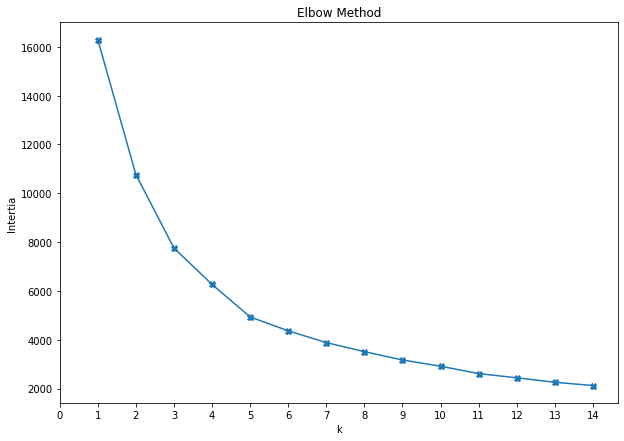

In [286]:
# Elbow Method 
intertia= []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    intertia.append(km.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K,intertia,marker="X")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [292]:
km = KMeans(n_clusters=5,random_state=300)
km.fit(df_norm)
cluster = km.predict(df_norm)

df_norm['cluster'] = cluster
df_cluster = df_norm['cluster']
df_final = pd.concat([df_cluster,df], axis=1)

In [293]:
df_print = pd.DataFrame(df_final.groupby('cluster',as_index=False).mean().round(1))

pd.set_option('display.max_columns', None)
df_print

,cluster,TOTAL_SPEND,AVG_SPEND,LAST_VISIT,AGE
0,0,351.4,37.3,3.4,16.3
1,1,2903.6,22.3,0.4,26.2
2,2,25.8,7.8,17.3,4.0
3,3,275.5,8.3,1.5,23.0
4,4,43.2,6.3,4.8,9.2


In [294]:
df_cluster.value_counts()

3    1813
4    1047
2     614
0     322
1     279
Name: cluster, dtype: int64

# Shopping dominant

In [301]:
or1 = data.drop(data.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,23,24,25,26,27,28,29,30,31]], axis = 1)

#or1 = data[['CUST_CODE','TOTAL_SPEND','AVG_SPEND','LAST_VISIT','AGE']]
#df = or1.copy()
#df_norm = or1.copy()

df = or1.drop(columns='CUST_CODE').copy()
df_norm = or1.drop(columns='CUST_CODE').copy()

In [302]:
for col in df_norm.columns:
    df_norm[col] = (df_norm[col] - df_norm[col].mean())/df_norm[col].std()

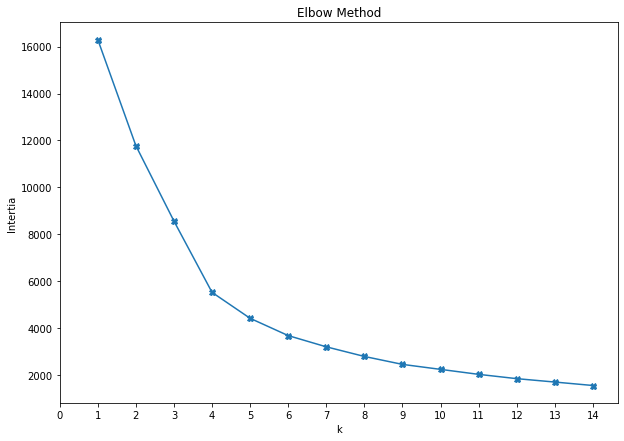

In [303]:
# Elbow Method 
intertia= []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    intertia.append(km.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K,intertia,marker="X")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [305]:
km = KMeans(n_clusters=4,random_state=300)
km.fit(df_norm)
cluster = km.predict(df_norm)

df_norm['cluster'] = cluster
df_cluster = df_norm['cluster']
df_final = pd.concat([df_cluster,df], axis=1)

In [306]:
df_print = pd.DataFrame(df_final.groupby('cluster',as_index=False).mean().round(1))

pd.set_option('display.max_columns', None)
df_print

,cluster,PROB_BAS_DOMI_FRESH,PROB_BAS_DOMI_GROCERY,PROB_BAS_DOMI_MIXED,PROB_BAS_DOMI_NONFOOD
0,0,0.1,0.8,0.1,0.0
1,1,0.6,0.2,0.1,0.0
2,2,0.2,0.1,0.1,0.6
3,3,0.2,0.1,0.6,0.0


In [307]:
df_cluster.value_counts()

1    2476
3     745
0     585
2     269
Name: cluster, dtype: int64

In [ ]:
km = KMeans(n_clusters=5,random_state=300)
km.fit(df_norm)
cluster = km.predict(df_norm)

df_norm['cluster'] = cluster
df_cluster = df_norm['cluster']
df_final = pd.concat([df_cluster,df], axis=1)

[0.16024629 0.12075342 0.25163061 0.33068877 0.03265543 0.03382084
 0.04445874 0.0257459 ]


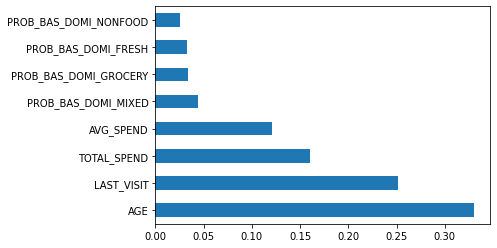

In [281]:
#Feature Important
x = df_final[['TOTAL_SPEND', 'AVG_SPEND', 'LAST_VISIT', 'AGE']] #independent columns
y = df_final['cluster']  #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()